# MNIST

"The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning."

In [34]:
# Step 1: Import the Dependencies

# Usual dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import os
import numpy as np

# new dependencies
from IPython.display import Image, SVG
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler #this scales the data based on the minimum and maximum values

# keras specific dependencies
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense
from keras.datasets import mnist

### Preprocessing

In [35]:
# Step 2: load in the MNIST data using the cariable format (X_train, y_train), (X_test, y_test)
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(f"Data Features Shape: {X_train.shape}")
print("-----" * 4)
print(f"Data Labels Shape: {y_train.shape}")

Data Features Shape: (60000, 28, 28)
--------------------
Data Labels Shape: (60000,)


In [36]:
# Note: the features is a 3dimensional array and the labels are 1dimensional

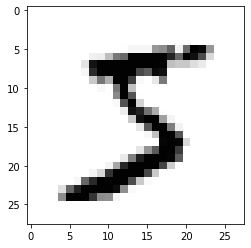

In [37]:
# Step 3: Plot the data to see what it looks like

plt.imshow(X_train[0, :, :], cmap=plt.cm.Greys)

Each image is a 28x28 pixel greyscale image with values 0-255 (color scale)  

That is usually what an image is. It is an array of pixels ranging from 0-255

In [38]:
print(X_train[0,:,:])

# view the below and you can sort of see the image structure using the numbers

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

### I need to flatten the data into rows of 1d image arrays in order to make a neural network

In [39]:
# Step 4: To "flatten" the data,we multiply the second and third dimensions (28 * 28)
ndims = X_train.shape[1] * X_train.shape[2]

In [40]:
# Step 5: Then I reshape the datasets to match a 2dimensional numpy array (60000, 784)
X_train = X_train.reshape(X_train.shape[0], ndims)
X_test = X_test.reshape(X_test.shape[0], ndims)

In [41]:
print(f"Training Data: {X_train.shape}")
print(f"Testing Data: {X_test.shape}")

Training Data: (60000, 784)
Testing Data: (10000, 784)


### I scale and normalize the dataset to 0-1. This makes the weights a little more "balanced" than if it were 0-255

In [42]:
# Step 6: Scale and Normalize the datasets using MinMaxScaler
scaler = MinMaxScaler().fit(X_train)

In [43]:
# Step 7: Transform the X_train and the X_test to the trained and scaled dataset
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### This concludes the preprocessing of the features

### Next step is to preprocess the labels (outputs)

IMPORTANT: The reason we need one hot encoding is because the output is expected to be of categorical value as opposed to a regressional value. The current output data we have are all integers (which is obviously not a categorical output)

In [44]:
# Step 8: One hot encoding to change our integers labels to categorical values
y_train[:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [45]:
# We can assume that each "label" is a number between 0-9 as shown above. 
# Because we know the "limit" is between 0-9, we can set a class limit when applying to_categorical to the output data
lim_classes = 10
y_train = to_categorical(y_train, lim_classes)
y_test = to_categorical(y_test, lim_classes)

# view the first "output that was shown above"
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### The '5' from before the one hot encoding is now encoded as [0,0,0,0,0,1,0,0,0,0]

# Building a Deep Multi-Layer Perceptron Model

... with 2 hidden layers

In [46]:
# Step 9: Create a Sequential Model

model = Sequential()

In [48]:
# Step 10: Create the first hidden layer. For this, I will specify the dimensions of the input layer.
# The input layer dimensions is just the number of total pixels (28 x 28, or 784)
model.add(Dense(units=100, activation='relu', input_dim=X_train.shape[1]))

### What is a Deep Multi-Layer Perceptron Model

When we connect all nodes from the first hidden layer to the next hidden layer

In [50]:
# Step 11: Create another hidden layer
model.add(Dense(units=100, activation='relu'))

In [51]:
# Step 12: Create the output layer using softmax activation for logistic regression.
# Just like the input layer, we specify the number of classes in the output layer (10 because one hot encoded for 0-9)
model.add(Dense(lim_classes, activation='softmax'))

# Compiling the Model

In [52]:
# Step 13: compile the model with adam optimizer, categorical crossentropy, and accuracy as a metric
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [54]:
# Step 14: Summarize the model (for records)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


# Train the Deep Multi-Layer Perceptron Model

Recap: training is when we update our weights using an optimizer (adam) and a loss function (categorical crossentropy) across a number of iterations (or epochs). Shuffling is optional but is used commonly to increase detail of each cycle.

In [55]:
# Step 15: Train the compiled model

model.fit(X_train, y_train, epochs=25, shuffle=True,verbose=2)

Epoch 1/25
1875/1875 - 1s - loss: 0.2476 - accuracy: 0.9270
Epoch 2/25
1875/1875 - 1s - loss: 0.1057 - accuracy: 0.9674
Epoch 3/25
1875/1875 - 1s - loss: 0.0755 - accuracy: 0.9762
Epoch 4/25
1875/1875 - 1s - loss: 0.0568 - accuracy: 0.9817
Epoch 5/25
1875/1875 - 1s - loss: 0.0473 - accuracy: 0.9846
Epoch 6/25
1875/1875 - 1s - loss: 0.0384 - accuracy: 0.9879
Epoch 7/25
1875/1875 - 1s - loss: 0.0330 - accuracy: 0.9890
Epoch 8/25
1875/1875 - 1s - loss: 0.0266 - accuracy: 0.9908
Epoch 9/25
1875/1875 - 1s - loss: 0.0243 - accuracy: 0.9921
Epoch 10/25
1875/1875 - 1s - loss: 0.0209 - accuracy: 0.9928
Epoch 11/25
1875/1875 - 1s - loss: 0.0172 - accuracy: 0.9940
Epoch 12/25
1875/1875 - 1s - loss: 0.0189 - accuracy: 0.9934
Epoch 13/25
1875/1875 - 1s - loss: 0.0151 - accuracy: 0.9950
Epoch 14/25
1875/1875 - 1s - loss: 0.0158 - accuracy: 0.9946
Epoch 15/25
1875/1875 - 1s - loss: 0.0132 - accuracy: 0.9957
Epoch 16/25
1875/1875 - 1s - loss: 0.0124 - accuracy: 0.9959
Epoch 17/25
1875/1875 - 1s - loss

In [56]:
# Optional Step: Saving and loading the model
model.save("models/mnist_model.h5")

In [57]:
from keras.models import load_model
model = load_model("models/mnist_model.h5")

# Evaluating the Deep Multi-Layer Perceptron Model

Using the testing data on the trained model to validate the strength/accuracy of the model. (testing the ability to predict new and previously seen data

In [58]:
# Step 16: create the mode_loss and model_accuracy from model.evaluate
model_loss, model_accuracy = model.evaluate(
    X_test, y_test, verbose=2
)

313/313 - 0s - loss: 0.1555 - accuracy: 0.9756


# Make Predictions

Now that the accuracy is at a good point (98%), we make predictions by inputting new data.